 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [349]:
import pandas as pd
from pathlib import Path
import numpy as np
import datetime as dt

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [350]:
# Reading whale returns
whale_returns_csv = Path("../HW4/Resources/whale_returns.csv")
# YOUR CODE HERE
read_whale_returns = pd.read_csv(whale_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
read_whale_returns = pd.DataFrame(read_whale_returns)
read_whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [351]:
# Count nulls
# YOUR CODE HERE
read_whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [352]:
# Drop nulls
# YOUR CODE HERE
read_whale_returns = read_whale_returns.dropna()
read_whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [353]:
# Reading algorithmic returns
algo_returns_csv = Path("../HW4/Resources/algo_returns.csv")
# YOUR CODE HERE
read_algo_returns = pd.read_csv(algo_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
read_algo_returns = pd.DataFrame(read_algo_returns)
read_algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [354]:
# Count nulls
# YOUR CODE HERE
read_algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [355]:
# Drop nulls
# YOUR CODE HERE
read_algo_returns = read_algo_returns.dropna()
read_algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [356]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("../HW4/Resources/sp500_history.csv")
# YOUR CODE HERE
sp500_returns = pd.read_csv(sp500_history_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_returns = pd.DataFrame(sp500_returns)
sp500_returns = sp500_returns.sort_index(ascending=True)

sp500_returns.head()

,Close
Date,
2012-10-01,"$1,444.49"
2012-10-02,"$1,445.75"
2012-10-03,"$1,450.99"
2012-10-04,"$1,461.40"
2012-10-05,"$1,460.93"


In [357]:
# Check Data Types
# YOUR CODE HERE
sp500_returns.dtypes

Close    object
dtype: object

In [358]:
# Fix Data Types
# YOUR CODE HERE
sp500_returns['Close'] = sp500_returns['Close'].str.replace('$', '')
sp500_returns['Close'] = sp500_returns['Close'].str.replace(',', '')
sp500_returns['Close'] = sp500_returns.astype('float')


sp500_returns.dtypes

Close    float64
dtype: object

In [359]:
# Calculate Daily Returns
# YOUR CODE HERE
sp500_returns.pct_change()


,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [360]:
# Drop nulls
# YOUR CODE HERE
sp500_returns = sp500_returns.dropna()

In [361]:
# Rename Column
# YOUR CODE HERE


sp500_returns = sp500_returns.rename(columns={
    "Date": "Date",
    "Close": "S&P 500"
    
})

#sp500_returns = sp500_returns.dropna()

sp500_returns.pct_change()


,S&P 500
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


## Combine Whale, Algorithmic, and S&P 500 Returns

In [362]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE

all_returns = pd.concat([read_whale_returns,  read_algo_returns, sp500_returns], axis="columns", join="inner")
all_returns.dropna()
all_returns.head(5)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,2107.78
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,2098.53
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,2101.04
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,2071.26
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,2079.43


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

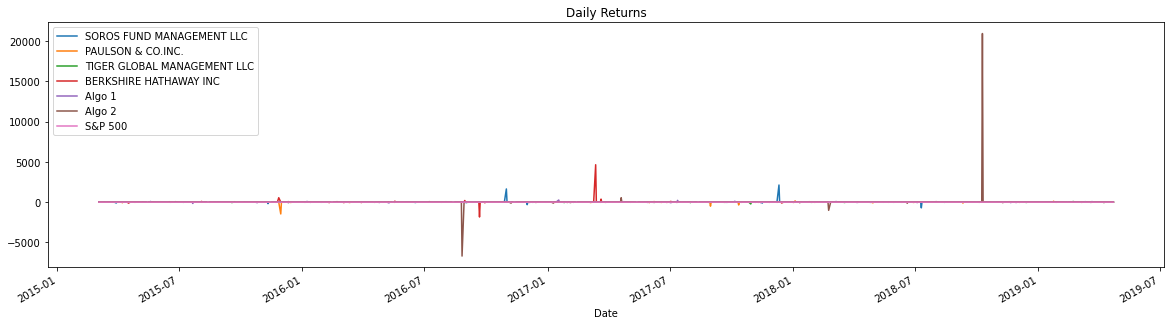

In [363]:
# Plot daily returns
# YOUR CODE HERE
all_returns = all_returns.pct_change()


all_returns.plot(figsize=(20,5), title= "Daily Returns")

<AxesSubplot:title={'center':'Cummulative Returns'}, xlabel='Date'>

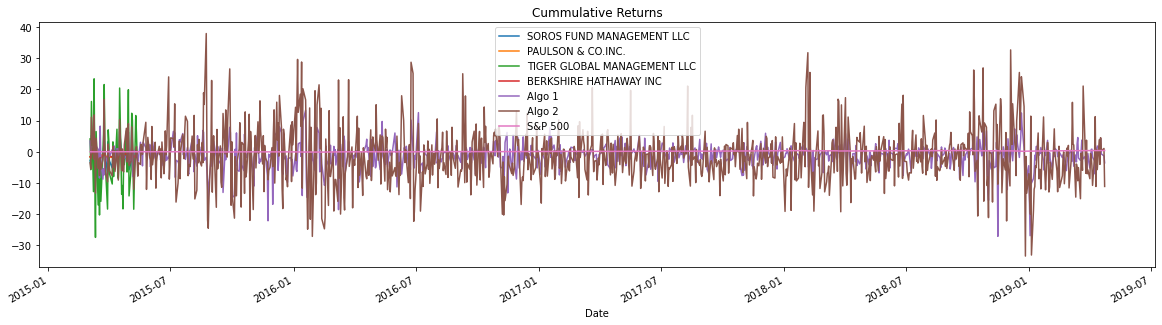

In [364]:
# Plot cumulative returns
# YOUR CODE HERE
cummulative_returns = (1+all_returns).cumprod() - 1
cummulative_returns

cummulative_returns.plot(figsize=(20,5), title="Cummulative Returns")

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

C:\Users\Japes\anaconda3\lib\site-packages\numpy\core\_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


<AxesSubplot:>

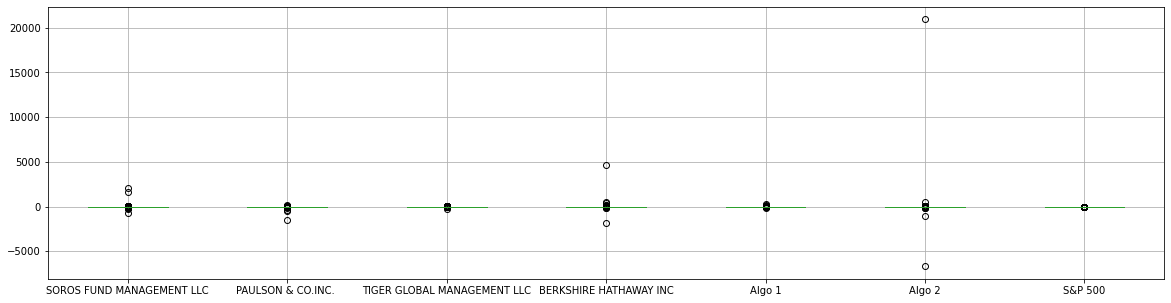

In [365]:
# Box plot to visually show risk
# YOUR CODE HERE
#1
all_returns.boxplot(figsize=(20,5))


In [366]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE


all_returns_std = all_returns.std() * np.sqrt(252)
all_returns_std



SOROS FUND MANAGEMENT LLC               NaN
PAULSON & CO.INC.                       NaN
TIGER GLOBAL MANAGEMENT LLC             NaN
BERKSHIRE HATHAWAY INC                  NaN
Algo 1                           249.404199
Algo 2                         10829.346406
S&P 500                            0.135830
dtype: float64

In [367]:
#### Alogrithm 2 is the most risky above the S&P500.

<AxesSubplot:ylabel='Frequency'>

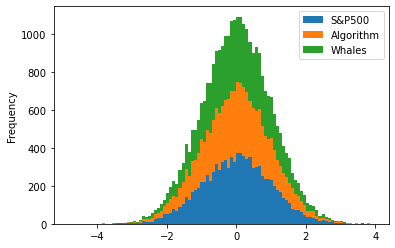

In [368]:
#Normal distribution
sp500_daily_std = np.random.normal(size=10000)
algo_daily_std = np.random.normal(size=10000)
whale_daily_std = np.random.normal(size=10000)

portfolio_std = pd.DataFrame({
    "S&P500": sp500_daily_std,
    "Algorithm": algo_daily_std,
    "Whales": whale_daily_std
})

portfolio_std.plot.hist(stacked=True, bins=100)

In [369]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE

all_returns_std = all_returns.std() * np.sqrt(252)
all_returns_std

SOROS FUND MANAGEMENT LLC               NaN
PAULSON & CO.INC.                       NaN
TIGER GLOBAL MANAGEMENT LLC             NaN
BERKSHIRE HATHAWAY INC                  NaN
Algo 1                           249.404199
Algo 2                         10829.346406
S&P 500                            0.135830
dtype: float64

In [370]:
#### The Whales portfolio has more risk than the Algorithm portfolio and the Algorithm portfolio has more risk than the S&P500 portfolio.

In [371]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE
annualized_std = all_returns * np.sqrt(252)
annualized_std.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,-43.846498,-26.205505,65.302104,-26.056114,54.328504,-56.271409,-0.069665
2015-03-05,12.714976,4.088384,-30.625636,9.470066,-14.109312,12.528649,0.018987
2015-03-06,-47.122916,-29.793863,-73.052461,-46.786651,66.514874,-57.956459,-0.225004
2015-03-09,-17.043766,-34.642183,-26.810561,-13.871775,1.570267,-17.679692,0.062616


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

<AxesSubplot:xlabel='Date'>

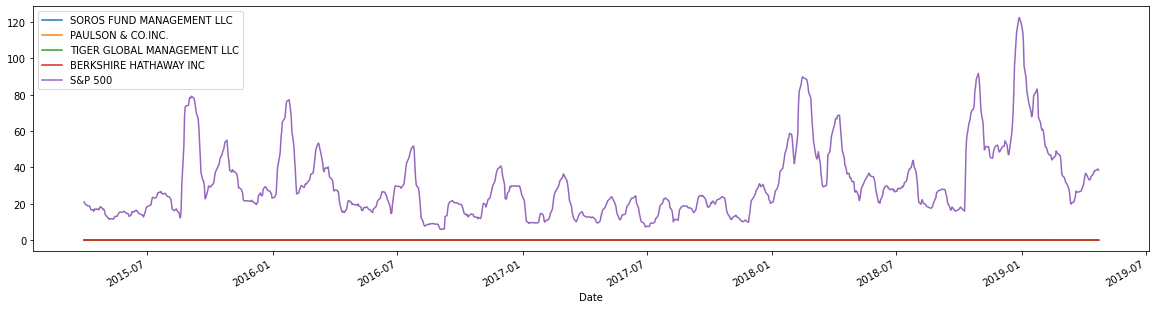

In [372]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
# YOUR CODE HERE
sp500_whale = pd.concat([read_whale_returns, sp500_returns], axis="columns", join="inner")

sp500_whale.rolling(window=21).std().plot(figsize=(20,5))



In [373]:
# Construct a correlation table
# YOUR CODE HERE
std_correlation = sp500_whale.corr()
std_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.033918
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.036711
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,-0.047823
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.041547
S&P 500,0.033918,0.036711,-0.047823,0.041547,1.000000


In [374]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
# YOUR CODE HERE

algo_daily = all_returns.pct_change()
algo_daily.dropna(inplace=True)

#Covariance
algo_covariance = all_returns['Algo 1'].cov(all_returns['S&P 500'])
algo_covariance

#Variance
algo_variance = all_returns['Algo 1'].var()
algo_variance

#Beta
algo_1_beta = algo_covariance / algo_variance
algo_1_beta

5.071670209912257e-07

<AxesSubplot:title={'center':'Rolling 252-Day Beta of Algo 1'}, xlabel='Date'>

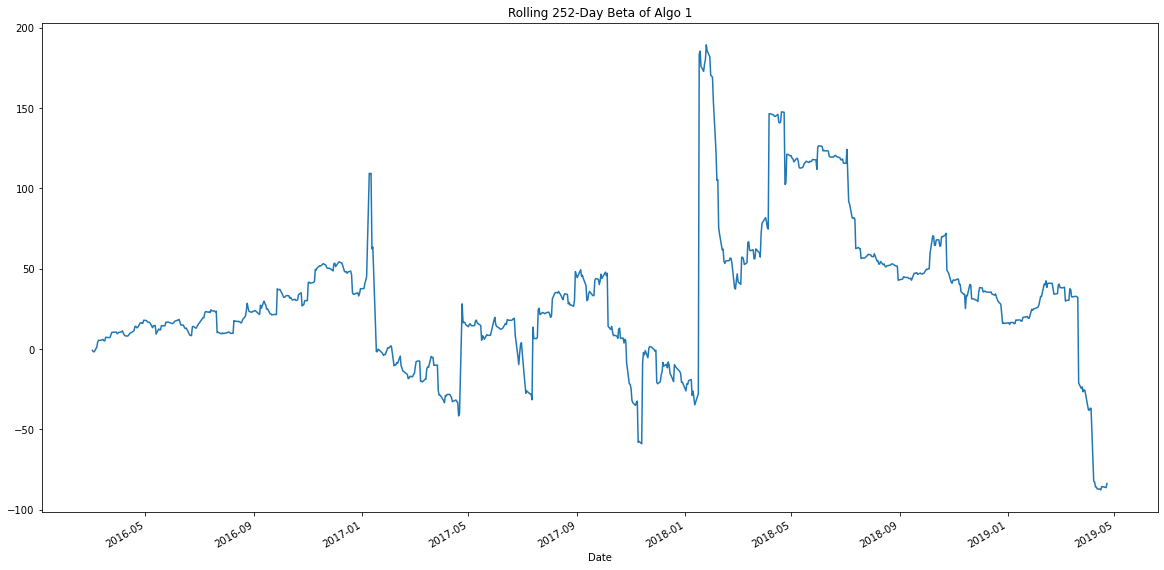

In [375]:
# Calculate a rolling window using the exponentially weighted moving average. 
# YOUR CODE HERE
rolling_covariance = all_returns['Algo 1'].rolling(window=252).cov(all_returns['S&P 500'])
rolling_variance = all_returns['S&P 500'].rolling(window=252).var()

rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 252-Day Beta of Algo 1')

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [376]:
# Calculate annualized Sharpe Ratios
# YOUR CODE HERE
sharpe_ratios = (all_returns.mean() * 252) / (all_returns.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC           NaN
PAULSON & CO.INC.                   NaN
TIGER GLOBAL MANAGEMENT LLC         NaN
BERKSHIRE HATHAWAY INC              NaN
Algo 1                        -0.745412
Algo 2                         0.270121
S&P 500                        0.656761
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

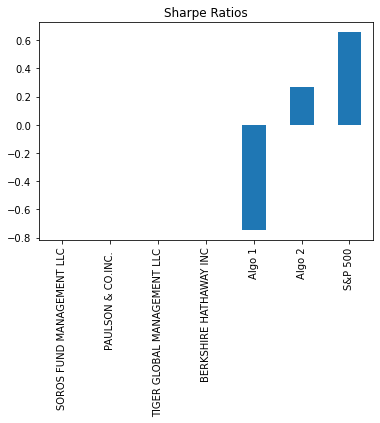

In [377]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [378]:
# Read the first stock
# YOUR CODE HERE
syf_historical_csv = Path("../HW4/Resources/syf_historical.csv")
syf_returns = pd.read_csv(syf_historical_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
syf_returns = pd.DataFrame(syf_returns)
syf_returns = syf_returns.sort_index(ascending=True)

syf_returns.head()

,Close
Date,
2017-01-03,37.06
2017-01-04,37.93
2017-01-05,36.91
2017-01-06,37.13
2017-01-09,36.90


In [379]:
# Read the second stock
# YOUR CODE HERE
fis_historical_csv = Path("../HW4/Resources/fis_historical.csv")
fis_returns = pd.read_csv(fis_historical_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
fis_returns = pd.DataFrame(fis_returns)
fis_returns = fis_returns.sort_index(ascending=True)

fis_returns.head()

,Close
Date,
2017-01-03,76.98
2017-01-04,78.24
2017-01-05,78.05
2017-01-06,78.89
2017-01-09,78.04


In [380]:
# Read the third stock
# YOUR CODE HERE
intu_historical_csv = Path("../HW4/Resources/intu_historical.csv")
intu_returns = pd.read_csv(intu_historical_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
intu_returns = pd.DataFrame(intu_returns)
intu_returns = intu_returns.sort_index(ascending=True)

intu_returns.head()

,Close
Date,
2017-01-03,114.75
2017-01-04,114.98
2017-01-05,115.69
2017-01-06,116.86
2017-01-09,116.51


In [381]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE
all_custom_returns = pd.concat([intu_returns, fis_returns, syf_returns], axis="columns", join="inner")
all_custom_returns.head()

,Close,Close,Close
Date,,,
2017-01-03,114.75,76.98,37.06
2017-01-04,114.98,78.24,37.93
2017-01-05,115.69,78.05,36.91
2017-01-06,116.86,78.89,37.13
2017-01-09,116.51,78.04,36.90


In [382]:
# Reset the index
# YOUR CODE HERE
all_custom_returns.set_index([0:0])
all_custom_returns.head()


SyntaxError: invalid syntax (<ipython-input-382-91759a3b852d>, line 3)

In [383]:
# Pivot so that each column of prices represents a unique symbol
# YOUR CODE HERE
all_custom_returns.rename(columns = {
    "Date": "Trade DATE",
    "Close": "INTU",
    "Close": "FIS",
    "Close": "SYF"
})

all_custom_returns.head()

#This output has an error, I tried to convert "Close" to a symbol name, but Close is all three column names, so the last change was replicated across all columns.

,Close,Close,Close
Date,,,
2017-01-03,114.75,76.98,37.06
2017-01-04,114.98,78.24,37.93
2017-01-05,115.69,78.05,36.91
2017-01-06,116.86,78.89,37.13
2017-01-09,116.51,78.04,36.90


In [384]:
# Drop Nulls
# YOUR CODE HERE
all_custom_returns.dropna()



,Close,Close,Close
Date,,,
2017-01-03,114.75,76.98,37.06
2017-01-04,114.98,78.24,37.93
2017-01-05,115.69,78.05,36.91
2017-01-06,116.86,78.89,37.13
2017-01-09,116.51,78.04,36.90
...,...,...,...
2019-12-24,264.33,137.88,36.32
2019-12-26,266.87,138.70,36.26
2019-12-27,267.06,139.75,36.29


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [385]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE
#Information used from: https://www.codingfinance.com/post/2018-04-05-portfolio-returns-py/

ret_data = all_custom_returns.pct_change()[1:]

weighted_returns = (weights * ret_data)
weighted_returns.head()

,Close,Close,Close
Date,,,
2017-01-04,0.000668,0.005456,0.007825
2017-01-05,0.002058,-0.000809,-0.008964
2017-01-06,0.003371,0.003587,0.001987
2017-01-09,-0.000998,-0.003591,-0.002065
2017-01-10,-0.001144,-0.001666,0.000542


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [386]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
# YOUR CODE HERE
all_portfolios = pd.concat([all_custom_returns, all_returns], axis="columns", join="inner")
all_portfolios.head()


,Close,Close,Close,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,,,,
2017-01-03,114.75,76.98,37.06,-4.292308,1.874558,-1.636213,-2.292815,-3.615324,-12.284838,0.008487
2017-01-04,114.98,78.24,37.93,1.692770,-0.540542,-1.254875,0.483860,0.694952,0.570971,0.005722
2017-01-05,115.69,78.05,36.91,-0.734091,-0.415680,3.215296,0.318600,-1.316104,-1.127309,-0.000771
2017-01-06,116.86,78.89,37.13,0.156325,-4.226055,-0.715596,-0.647862,-0.908000,-1.027150,0.003517
2017-01-09,116.51,78.04,36.90,-1.128565,-1.151497,2.743716,-1.466160,-8.626855,-124.536754,-0.003549


In [387]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE
all_portfolios.dropna()

,Close,Close,Close,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,,,,
2017-01-03,114.75,76.98,37.06,-4.292308,1.874558,-1.636213,-2.292815,-3.615324,-12.284838,0.008487
2017-01-04,114.98,78.24,37.93,1.692770,-0.540542,-1.254875,0.483860,0.694952,0.570971,0.005722
2017-01-05,115.69,78.05,36.91,-0.734091,-0.415680,3.215296,0.318600,-1.316104,-1.127309,-0.000771
2017-01-06,116.86,78.89,37.13,0.156325,-4.226055,-0.715596,-0.647862,-0.908000,-1.027150,0.003517
2017-01-09,116.51,78.04,36.90,-1.128565,-1.151497,2.743716,-1.466160,-8.626855,-124.536754,-0.003549
...,...,...,...,...,...,...,...,...,...,...
2019-04-16,257.99,111.58,33.16,-2.898341,-1.335693,-3.088322,-1.079744,0.603391,-1.634218,0.000509
2019-04-17,256.27,111.10,33.24,-2.073108,-17.661104,4.306537,2.851033,0.483294,-2.803170,-0.002274
2019-04-18,257.77,110.89,33.34,-1.499843,-1.188925,-1.131886,-0.405345,-0.942926,-0.764890,0.001579


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [388]:
# Risk
# YOUR CODE HERE
all_portfolios_std = all_portfolios.std() * np.sqrt(252)
all_portfolios_std

Close                            659.167457
Close                            157.096773
Close                             58.458012
SOROS FUND MANAGEMENT LLC               NaN
PAULSON & CO.INC.                       NaN
TIGER GLOBAL MANAGEMENT LLC             NaN
BERKSHIRE HATHAWAY INC                  NaN
Algo 1                           288.336923
Algo 2                         13834.807432
S&P 500                            0.129170
dtype: float64

In [389]:
# Rolling
# YOUR CODE HERE
rolling_covariance = all_portfolios['SYF'].rolling(window=252).cov(all_portfolios['S&P 500'])
rolling_variance = all_portfolios['S&P 500'].rolling(window=252).var()

rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 252-Day Beta of SYF')

KeyError: 'SYF'

In [390]:
# Annualized Sharpe Ratios
# YOUR CODE HERE
sharpe_ratios = (all_portfolios.mean() * 252) / (all_portfolios.std() * np.sqrt(252))
sharpe_ratios

Close                           66.927031
Close                          155.322252
Close                          138.971489
SOROS FUND MANAGEMENT LLC             NaN
PAULSON & CO.INC.                     NaN
TIGER GLOBAL MANAGEMENT LLC           NaN
BERKSHIRE HATHAWAY INC                NaN
Algo 1                           0.102985
Algo 2                           0.605005
S&P 500                          0.975637
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

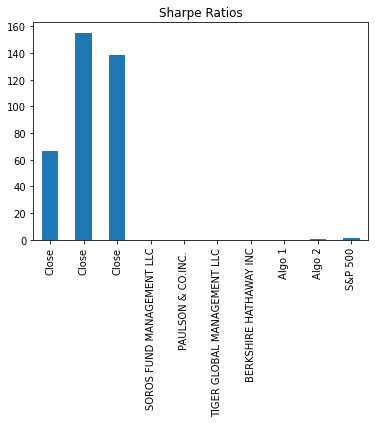

In [391]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

In [392]:
# Create a correlation analysis
# YOUR CODE HERE
std_correlation = all_portfolios.corr()
std_correlation

,Close,Close,Close,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Close,1.000000,0.949427,-0.184004,-0.031125,0.043774,0.039712,-0.055562,-0.035225,0.028130,0.019750
Close,0.949427,1.000000,-0.148482,-0.019645,0.026260,0.016478,-0.065575,-0.044076,0.023186,0.022818
Close,-0.184004,-0.148482,1.000000,0.051837,0.024295,-0.011808,0.039998,0.012402,-0.022679,0.074926
SOROS FUND MANAGEMENT LLC,-0.031125,-0.019645,0.051837,1.000000,0.000091,0.018516,-0.001112,-0.003894,-0.009105,0.024147
PAULSON & CO.INC.,0.043774,0.026260,0.024295,0.000091,1.000000,0.025140,0.004222,-0.001605,0.026866,-0.012105
TIGER GLOBAL MANAGEMENT LLC,0.039712,0.016478,-0.011808,0.018516,0.025140,1.000000,-0.009482,-0.000835,0.005753,0.057403
BERKSHIRE HATHAWAY INC,-0.055562,-0.065575,0.039998,-0.001112,0.004222,-0.009482,1.000000,-0.009598,0.002275,-0.009825
Algo 1,-0.035225,-0.044076,0.012402,-0.003894,-0.001605,-0.000835,-0.009598,1.000000,-0.002515,-0.008632
Algo 2,0.028130,0.023186,-0.022679,-0.009105,0.026866,0.005753,0.002275,-0.002515,1.000000,-0.173274
S&P 500,0.019750,0.022818,0.074926,0.024147,-0.012105,0.057403,-0.009825,-0.008632,-0.173274,1.000000


In [393]:
# Beta
# YOUR CODE HERE
all_portfolios = all_portfolios.pct_change()
all_portfolios.dropna(inplace=True)

#Covariance
syf_covariance = all_portfolios['SYF'].cov(all_portfolios['S&P 500'])
syf_covariance

#Variance
syf_variance = all_portfolios['SYF'].var()
syf_variance

#Beta
syf_1_beta = syf_covariance / syf_variance
syf_1_beta

#I couldn't figure out where this error was coming from, possibly the multiple name use of "SYF"

KeyError: 'SYF'